In [64]:
train_dir = 'data\\images\\train'
validate_dir = 'data\\images\\validate'
test_dir = 'data\\images\\test'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

validate_datagen = ImageDataGenerator()

print("Train set: ")
# Generating the Testing Data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=22,
        class_mode='categorical')

print("validate set: ")
# Generating the Testing Data
validate_generator = validate_datagen.flow_from_directory(
        validate_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=12,
        class_mode='categorical')

print("test set: ")
# Generating the Testing Data
test_generator = validate_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=12,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('Kształt danych wsadowych: ', data_batch.shape)
    print('Kształt danych wsadowych: ', labels_batch.shape)
    break

Train set: 
Found 111 images belonging to 16 classes.
validate set: 
Found 48 images belonging to 16 classes.


test set: 
Found 18 images belonging to 16 classes.
Kształt danych wsadowych:  (22, 64, 64, 1)
Kształt danych wsadowych:  (22, 16)


In [39]:
# class_indices have the numeric tag for each face
TrainClasses=train_generator.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future referenc
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'konrad', 1: 'subject01', 2: 'subject02', 3: 'subject03', 4: 'subject04', 5: 'subject05', 6: 'subject06', 7: 'subject07', 8: 'subject08', 9: 'subject09', 10: 'subject10', 11: 'subject11', 12: 'subject12', 13: 'subject13', 14: 'subject14', 15: 'subject15'}

 The Number of output neurons:  16


In [40]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2
 

model= Sequential()
model.add(Convolution2D(32, (4, 4), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(64, (4, 4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(128, (4, 4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

from tensorflow.keras import optimizers
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=["accuracy"])

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


# Starting the model training
history = model.fit_generator(train_generator,
                    steps_per_epoch=5,
                    epochs=200,
                    validation_data=validate_generator,
                    validation_steps=4)
 

Epoch 1/200


C:\Users\Konrad\AppData\Local\Temp\ipykernel_13940\3988424903.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


5/5 [==============================] - 2s 168ms/step - loss: 27.3660 - accuracy: 0.0899 - val_loss: 3.8406 - val_accuracy: 0.1875
Epoch 2/200
5/5 [==============================] - 1s 109ms/step - loss: 4.1024 - accuracy: 0.1685 - val_loss: 2.1923 - val_accuracy: 0.3750
Epoch 3/200
5/5 [==============================] - 1s 112ms/step - loss: 2.2911 - accuracy: 0.3034 - val_loss: 1.7584 - val_accuracy: 0.5208
Epoch 4/200
5/5 [==============================] - 1s 124ms/step - loss: 1.5792 - accuracy: 0.6180 - val_loss: 1.4140 - val_accuracy: 0.5000
Epoch 5/200
5/5 [==============================] - 1s 111ms/step - loss: 1.4322 - accuracy: 0.5056 - val_loss: 1.1024 - val_accuracy: 0.6458
Epoch 6/200
5/5 [==============================] - 1s 123ms/step - loss: 1.1916 - accuracy: 0.6854 - val_loss: 0.9106 - val_accuracy: 0.7292
Epoch 7/200
5/5 [==============================] - 1s 112ms/step - loss: 0.7722 - accuracy: 0.7865 - val_loss: 0.5972 - val_accuracy: 0.8125
Epoch 8/200
5/5 [=======

C:\Users\Konrad\AppData\Local\Temp\ipykernel_13940\2383050637.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania', color = 'green')
C:\Users\Konrad\AppData\Local\Temp\ipykernel_13940\2383050637.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji', color = 'orange')
C:\Users\Konrad\AppData\Local\Temp\ipykernel_13940\2383050637.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Strata walidacji', color = 'orange')


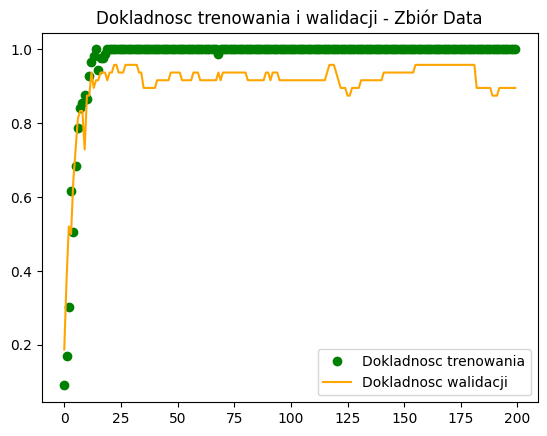

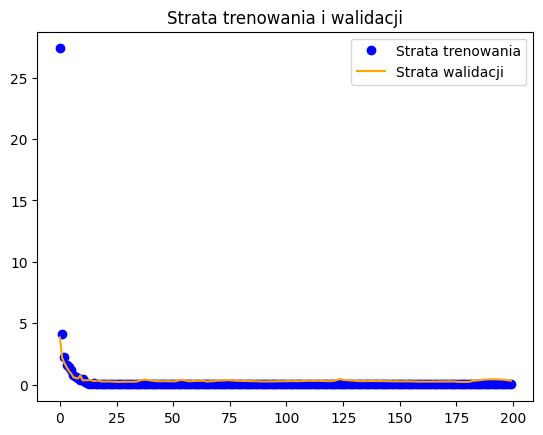

In [41]:
#model.save('data_best')
#new_model = tf.keras.models.load_model('saved_model/my_model')

import matplotlib.pyplot as plt
# Accessing the metrics after training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# Plotting the results
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania', color = 'green')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji', color = 'orange')
plt.title('Dokladnosc trenowania i walidacji - Zbiór Data')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji', color = 'orange')
plt.title('Strata trenowania i walidacji')
plt.legend() 
plt.show()

1/1 [==============================] - 0s 24ms/step


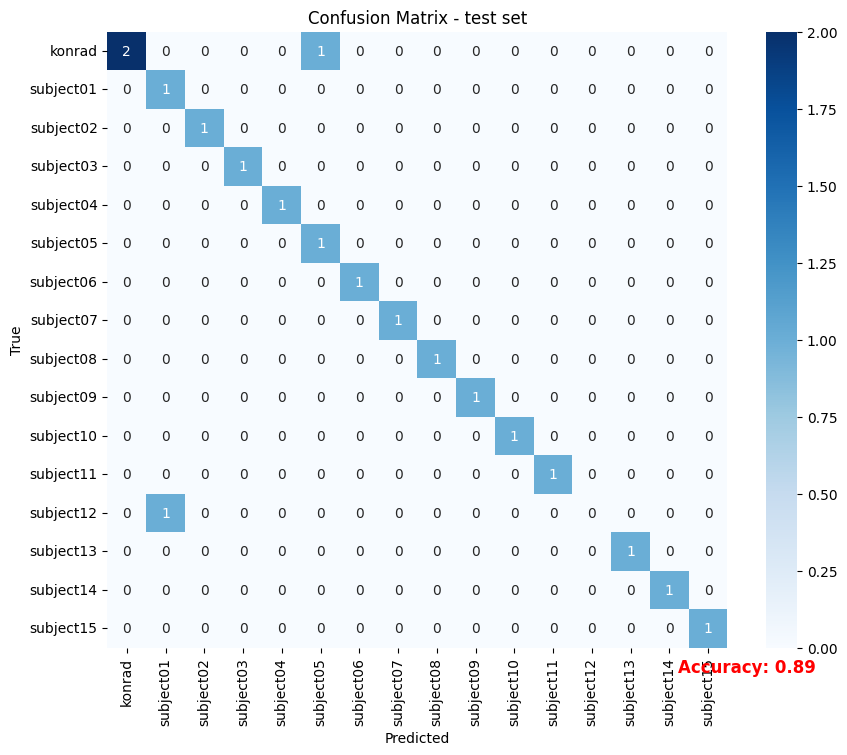


Classification Report:
              precision    recall  f1-score   support

      konrad       1.00      0.67      0.80         3
   subject01       0.50      1.00      0.67         1
   subject02       1.00      1.00      1.00         1
   subject03       1.00      1.00      1.00         1
   subject04       1.00      1.00      1.00         1
   subject05       0.50      1.00      0.67         1
   subject06       1.00      1.00      1.00         1
   subject07       1.00      1.00      1.00         1
   subject08       1.00      1.00      1.00         1
   subject09       1.00      1.00      1.00         1
   subject10       1.00      1.00      1.00         1
   subject11       1.00      1.00      1.00         1
   subject12       0.00      0.00      0.00         1
   subject13       1.00      1.00      1.00         1
   subject14       1.00      1.00      1.00         1
   subject15       1.00      1.00      1.00         1

    accuracy                           0.89        18
  

c:\Users\Konrad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Konrad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Konrad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [67]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

validation_steps = len(test_generator)
y_true = []
y_pred = []


for i in range(validation_steps):
    data_batch, labels_batch = next(test_generator)
    y_true.extend(np.argmax(labels_batch, axis=1))  # Convert one-hot encoded labels to class indices
    predictions = model.predict(data_batch)
    y_pred.extend(np.argmax(predictions, axis=1))

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - test set')
plt.show()

# Display classification report
print('\nClassification Report:')
print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))




Prediction is:  konrad


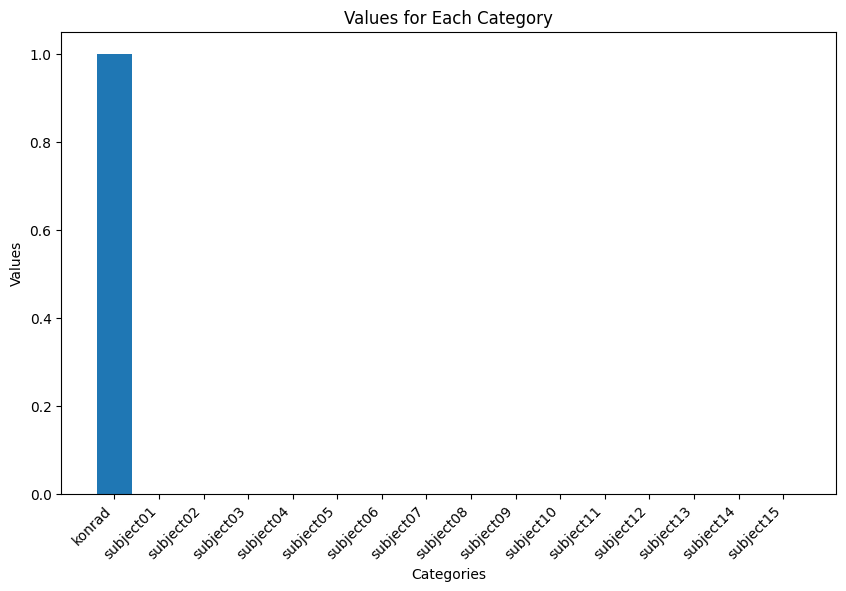

In [53]:
import numpy as np
from keras.preprocessing import image

ImagePath= 'data\\images\\test\\konrad\\ja_nowe.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64), color_mode='grayscale')
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=model.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

if len(ResultMap) == result.shape[1]:
    # Get labels and values
    labels = list(ResultMap.values())
    values = result.flatten()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Values for Each Category')
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
    plt.show()
else:
    print("Length mismatch between ResultMap and result_array.")